This notebook shows an implementation of the epsilon "hard" support vector regression on a dataset of points that follows a linear function.

**Model:**

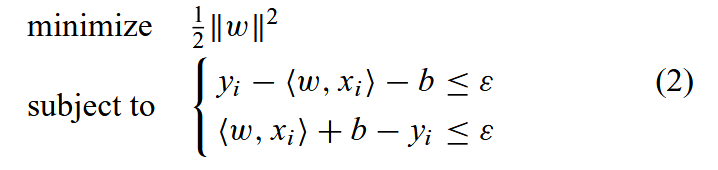

**Remarks:**
- The epsilon hard support vector regression function has been "self"-coded in the module `sv_machines.prediction_functions.epsilon_sv_regression` since the scikit.learn implementation `sklearn.svm.LinearSVR` offers only the version with slack variables *(one cannot set the parameter $C$ to 0)*. We used the third party python library `cvxpy` to solve the convex optimization problem returning the parameters.

In [25]:
%load_ext autoreload
%autoreload 2

# Third party libraries imports
import numpy as np

# Local imports
from sv_machines.datasets.line import get_line_dataset, get_line_plot
from sv_machines.datasets.utils import add_prediction_function_to_plot
from sv_machines.prediction_functions.epsilon_sv_regression_hard_border import (
    get_epsilon_sv_function,
)
from sv_machines.prediction_functions.linear_regression import get_linear_regression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load a line dataset

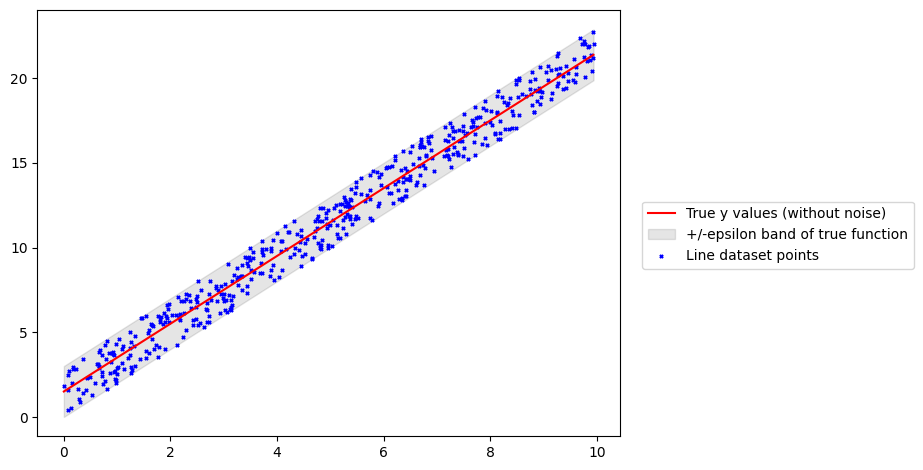

In [26]:
slope, offset, epsilon = 2.0, 1.5, 1.5

x_line, y_line = get_line_dataset(
    slope=slope, offset=offset, epsilon=epsilon, num_points=500, epsilon_strict=True
)
fig, ax = get_line_plot(x_line, y_line, slope, offset, epsilon, with_true_function=True)
fig.tight_layout()
fig.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Perfom $\varepsilon$ "hard" support vector regression on the dataset

We perform it with 3 different values of epsilon on the dataset above:
- $\varepsilon$ *(almost exactly the value of epsilon for the data)*
- $\varepsilon \times 2$ *(twice the value of epsilon for the data to show the result when the algorithm has more "freedom" than needed)*
- $\varepsilon \times 0.5$ $\rightarrow$ *the optimizer should return that the problem is infeasible.

x_line shape: (500, 1)
y_line shape: (500, 1)
Regression function obtained is y= [[1.9960958]]^T * x + [1.52163213]


c:\Users\Famille\Documents\Annabelle\SV-Machines\.venv\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


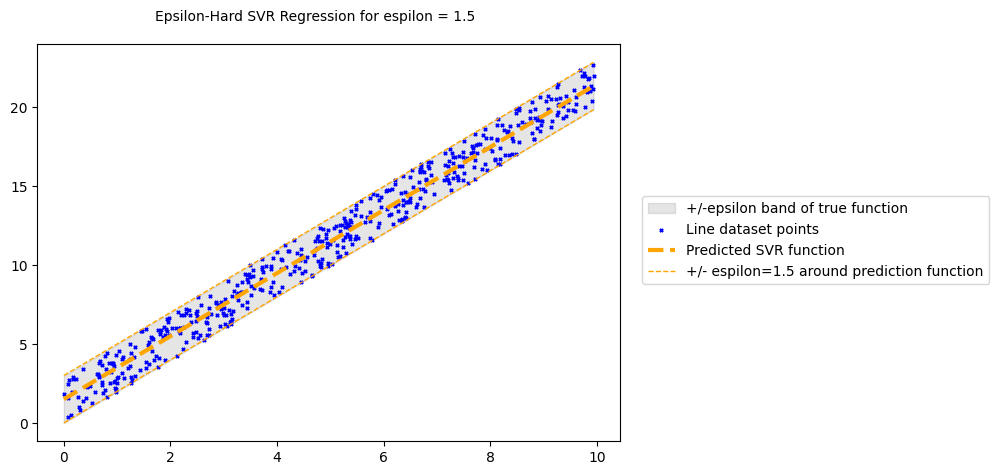

In [27]:
svr_function_1, svr_params_1 = get_epsilon_sv_function(x_line, y_line, epsilon)

fig, ax = get_line_plot(
    x_line, y_line, slope, offset, epsilon, with_true_function=False
)
add_prediction_function_to_plot(
    ax=ax,
    x_dataset=x_line,
    prediction_function=svr_function_1,
    epsilon=epsilon,
    prediction_function_label="Predicted SVR function",
)
fig.suptitle(f"Epsilon-Hard SVR Regression for espilon = {epsilon}", fontsize=10)
fig.tight_layout()
fig.legend(loc="center left", bbox_to_anchor=(1, 0.5))

For epsilon larger than the actual epsilon band of the data, notice how the algorithm outputs the flatest prediction function possible.

x_line shape: (500, 1)
y_line shape: (500, 1)
Regression function obtained is y= [[1.66031479]]^T * x + [3.27611212]
Linear regression model coefficients: slope=[2.0171763], intercept=1.4459084596879581


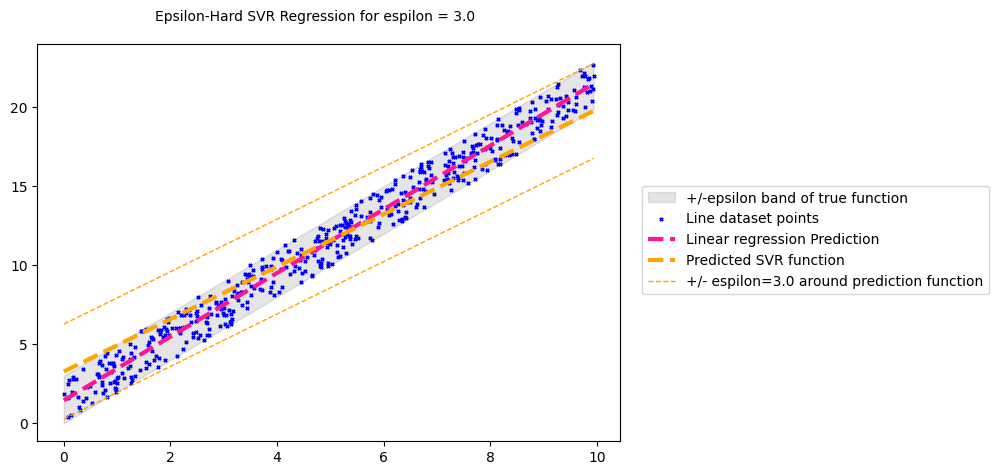

In [28]:
epsilon_2 = epsilon * 2
svr_function_2, svr_params_2 = get_epsilon_sv_function(x_line, y_line, epsilon_2)

fig_2, ax_2 = get_line_plot(
    x_line, y_line, slope, offset, epsilon, with_true_function=False
)

# Linear Regression function for comparison
x_regression_2 = np.linspace(min(x_line), max(x_line), 50)
lin_reg_model, lin_reg_params = get_linear_regression(x_line, y_line)
y_linear_regression = lin_reg_model(x_regression_2)
ax_2.plot(
    x_regression_2,
    y_linear_regression,
    linestyle="--",
    linewidth=3,
    color="deeppink",
    label="Linear regression Prediction",
)
add_prediction_function_to_plot(
    ax=ax_2,
    x_dataset=x_line.reshape(-1, 1),
    prediction_function=svr_function_2,
    epsilon=epsilon_2,
    prediction_function_label="Predicted SVR function",
)

fig_2.suptitle(f"Epsilon-Hard SVR Regression for espilon = {epsilon_2}", fontsize=10)
fig_2.tight_layout()
fig_2.legend(loc="center left", bbox_to_anchor=(1, 0.5))

For epsilon set too small notice that the problem is infeasible and the optimization algorithm thus wrong return any value.

In [7]:
epsilon_3 = epsilon / 2
svr_function_3, svr_params_3 = get_epsilon_sv_function(
    x_line, y_line, epsilon_3, verbose=True
)
print(svr_params_3["min_val"])

(CVXPY) Nov 29 10:11:54 AM: Your problem has 2 variables, 1000 constraints, and 0 parameters.
(CVXPY) Nov 29 10:11:54 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 29 10:11:54 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 29 10:11:54 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 29 10:11:54 AM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Nov 29 10:11:54 AM: Compiling problem (target solver=OSQP).
(CVXPY) Nov 29 10:11:54 AM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Nov 29 10:11:54 AM: Applying reduction CvxAttr2Constr
(CVXPY) Nov 29 10:11:54 AM: Applying reduction Qp2SymbolicQp
(CVXPY) Nov 29 10:11:54 AM: Applying reduction QpMatrixStuffing
(CVXPY) Nov 29 10:11:54 AM: Applying reduction OSQP
(CVXPY) Nov 29 10:11:54 AM: Finished problem compilation (

x_line shape: (500, 1)
y_line shape: (500, 1)
                                     CVXPY                                     
                                     v1.7.4                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
-----------------------------------------------------------------
           OSQP v1.0.0  -  Operator Splitting QP Solver
              (c) The OSQP Developer Team
-----------------------------------------------------------------
problem:  variables n = 2, constraints m = 1000
          nnz(P) + nnz(A) = 2001
set